# Linear Regressions

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import model_selection as ms
sklearn.set_config(print_changed_only=False)

import xgboost

import import_ipynb
from _Self_Written_Functions_Sheet import rmse

print('The notebook is running with cuda:', tf.test.is_built_with_cuda())

importing Jupyter notebook from _Self_Written_Functions_Sheet.ipynb
The notebook is running with cuda: True


In [3]:
hp_full_strd = pd.read_csv('..\hp_1b_null_impute_dum_full_train.csv', index_col=0)
hp_full_strd

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,Sal

In [4]:
hp_logsaleprice = pd.read_csv('..\hp_1a_no_imputation_logsaleprice.csv', index_col=0)
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


## Attempting Multilinear Regression

## Using hp_full_strd dataset

In [5]:
state = 0

# setting up train and test sets
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_full_strd,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

# Must flatten to fit
ytrain = ytrain.values.flatten()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [8]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(hp_full_strd.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam",
              metrics=["mean_squared_error"])
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 288)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               28900     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 35,251
Trainable params: 35,251
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit(xtrain, ytrain, batch_size=2,
                    epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
466/466 [==============================] - 3s 4ms/step - loss: 3.8334 - mean_squared_error: 3.8334 - val_loss: 0.1776 - val_mean_squared_error: 0.1776
Epoch 2/100
466/466 [==============================] - 2s 4ms/step - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.1076 - val_mean_squared_error: 0.1076
Epoch 3/100
466/466 [==============================] - 2s 4ms/step - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.0992 - val_mean_squared_error: 0.0992
Epoch 4/100
466/466 [==============================] - 2s 4ms/step - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 5/100
466/466 [==============================] - 2s 4ms/step - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0685 - val_mean_squared_error: 0.0685
Epoch 6/100
466/466 [==============================] - 2s 4ms/step - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0853 - val_mean_squared_error: 0.0853
Epoch 7/100
466/466 [=

466/466 [==============================] - 2s 3ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0970 - val_mean_squared_error: 0.0970
Epoch 52/100
466/466 [==============================] - 2s 4ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 53/100
466/466 [==============================] - 2s 4ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 54/100
466/466 [==============================] - 2s 4ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 55/100
466/466 [==============================] - 1s 3ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 56/100
466/466 [==============================] - 2s 4ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 57/100
466/466 [=======

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(xtrain)
print(np.sqrt(mean_squared_error(ytrain,pred_train)))

pred = model.predict(xtest)
print(np.sqrt(mean_squared_error(ytest,pred)))

0.10483783407780599
0.17652552180839887


In [5]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lm = LinearRegression()

# parameters to use
normilize = [True, False]
fitintercept = [True, False]
gparam_mlr_1 = {'fit_intercept': fitintercept, 'normalize': normilize}

# setting parameters
gs_mlr_1 = ms.GridSearchCV(lm, gparam_mlr_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_mlr_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_mlr_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_1, ytrain, xtrain)) 
test_rmse.append(rmse(gs_mlr_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_mlr_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df

Wall time: 2.28 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.950723,0.872391,0.087985,0.147059,-0.059074,False,True


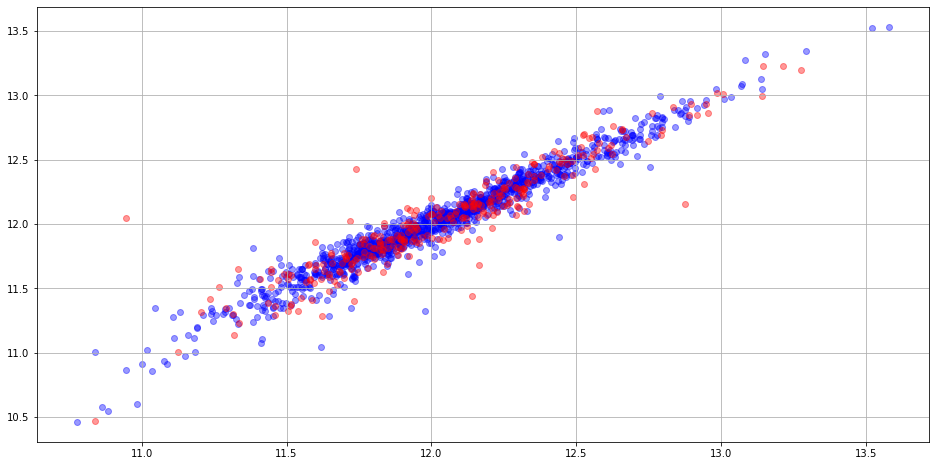

In [6]:
plt.figure(figsize=(16, 8))
plt.scatter(gs_mlr_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

## Trying with Lasso

In [7]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lasso = Lasso(random_state=state, max_iter=1000000, selection='random',
              normalize=True, fit_intercept=True)

# parameters to use
alphas = np.linspace(1e-4, 2.5e-4, 30)
gparam_lasso_1 = {'alpha': alphas}

# setting parameters
gs_lasso_1 = ms.GridSearchCV(lasso, gparam_lasso_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_lasso_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_lasso_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_lasso_1, ytrain, xtrain))
test_rmse.append(rmse(gs_lasso_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_lasso_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lasso_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lasso_res_df = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df

Wall time: 1.51 s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha
0,0.928439,0.93752,0.106029,0.102901,0.003128,0.000141


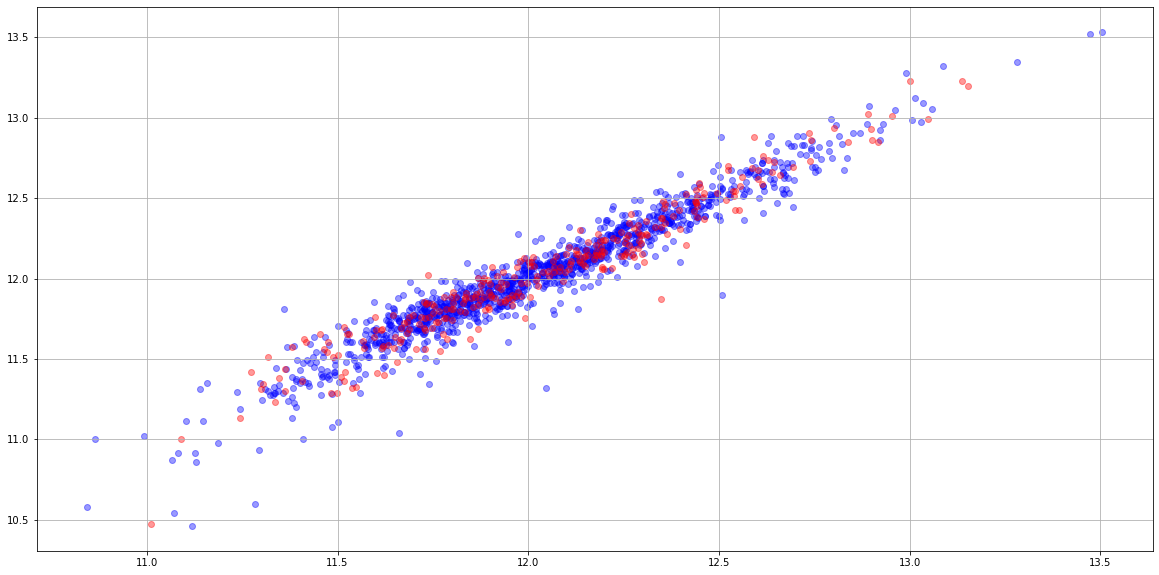

In [8]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

- we see underfitting

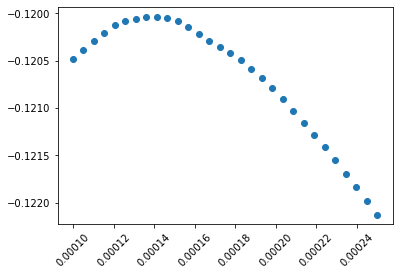

In [9]:
plt.xticks(rotation=45)
plt.scatter(gs_lasso_1.cv_results_['param_alpha'], gs_lasso_1.cv_results_['mean_test_score'])

## Using reduced DF hp_full_strd

In [10]:
lasso_coef_strd = pd.Series(gs_lasso_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(lasso_coef_strd.abs().sort_values(ascending=False).to_string())

GrLivArea                1.243346
OverallQual              0.531831
TotalBsmtSF              0.487646
LotArea                  0.350060
OverallCond              0.268744
BsmtFinSF1               0.248046
YearBuilt                0.204441
Functional_Sev           0.195178
PoolQC_Gd                0.176230
GarageCars               0.144351
Functional_Maj2          0.132599
Exterior1st_BrkComm      0.121937
KitchenAbvGr             0.117131
GarageArea               0.100402
Neighborhood_Crawfor     0.095324
Street_Pave              0.095224
Fireplaces               0.093949
Neighborhood_StoneBr     0.091007
SaleCondition_Partial    0.085622
Heating_Grav             0.082588
ScreenPorch              0.077572
LotFrontage              0.075905
WoodDeckSF               0.073088
Neighborhood_MeadowV     0.063408
BsmtFullBath             0.063075
MSSubClass_160.0         0.063050
YearRemodAdd             0.061188
MSZoning_FV              0.059343
SaleType_ConLI           0.056476
Neighborhood_N

In [11]:
lasso_coef_index_01 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) > 0]

hp_lasso_strd_reduced = hp_full_strd.iloc[:,lasso_coef_index_01]

# hp_lasso_strd_reduced.to_csv('..\hp_lasso_strd_reduced.csv')
hp_lasso_strd_reduced

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MSZoning_FV,MSZoning_RL,Street_Pave,LotShape_IR2,LotShape_Reg,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition1_RRAe,BldgType_Twnhs,RoofStyle_Gable,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior2nd_Stucco,MasVnrType_Stone,ExterQual_Fa,ExterQual_TA,ExterCond_Fa,ExterCond_TA,Foundation_PConc,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType2_GLQ,Heating_Grav,HeatingQC_TA,CentralAir_Y,KitchenQual_TA,Functional_Maj2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Gd,FireplaceQu_None,GarageType_Basment,GarageType_CarPort,GarageQual_Gd,GarageCond_Fa,GarageCond_TA,PavedDrive_Y,PoolQC_Gd,Fence_GdWo,SaleType_ConLI,SaleType_New,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_160.0,MoSold_2.0,MoSold_5.0,MoSold_6.0,MoSold_11.0
0,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.176060,0.168008,0.109641,0.289015,0.333333,0.50,0.5,0.333333,0.461538,0.00,0.996517,0.4,0.368280,0.000000,0.082210,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.243890,0.247694,0.194917,0.194917,0.000000,0.50,0.0,0.333333,0.307692,0.25,0.983085,0.4,0.309140,0.209270,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.121197,0.180569,0.123083,0.304978,0.333333,0.50,0.5,0.333333,0.307692,0.25,0.995522,0.4,0.408602,0.000000,0.056604,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.053865,0.148381,0.131695,0.290485,0.333333,0.25,0.0,0.333333,0.384615,0.25,0.994030,0.6,0.431452,0.000000,0.047170,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.163342,0.224730,0.170342,0.391514,0.333333,0.50,0.5,0.333333,0.538462,0.25,0.995025,0.6,0.561828,0.134831,0.113208,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## features that were kept with lasso

In [12]:
list(hp_lasso_strd_reduced.columns)

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'MSZoning_FV',
 'MSZoning_RL',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition1_RRAe',
 'BldgType_Twnhs',
 'RoofStyle_Gable',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_Stucco',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_Stucco',
 'MasVnrType_Stone',
 'ExterQual_Fa',
 'ExterQual_TA

In [13]:
# columns that were dropped by lasso

lasso_coef_index_00 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) == 0]
hp_lasso_strd_dropped = hp_full_strd.iloc[:, lasso_coef_index_00]
list(hp_lasso_strd_dropped.columns)

['BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MSZoning_RH',
 'MSZoning_RM',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon'

## using the lasso reduced dataset in multilinear regression

In [14]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_lso and test_lso sets
xtrain_lso, xtest_lso, ytrain_lso, ytest_lso = ms.train_test_split(hp_lasso_strd_reduced,
                                                                   hp_logsaleprice,
                                                                   test_size=0.2,
                                                                   random_state=0)

# Must flatten to fit
ytrain_lso = ytrain_lso.values.flatten()

lm = LinearRegression()

# parameters to use
fitintercept = [True, False]
gparam_mlr = {'fit_intercept': fitintercept}

# setting parameters
gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr.fit(xtrain_lso, ytrain_lso)

# setting up dataframe for results
train_scores.append(gs_mlr.best_estimator_.score(xtrain_lso, ytrain_lso))
test_scores.append(gs_mlr.best_estimator_.score(xtest_lso, ytest_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr, ytrain_lso, xtrain_lso))
test_rmse.append(rmse(gs_mlr, ytest_lso, xtest_lso))

# add the best parameters to the df
best_par_list.append(gs_mlr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'train_rmse', 'test_rmse', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_sel2 = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel2

Wall time: 36 ms


,TrainScores,TestScores,train_rmse,test_rmse,DiffRMSE,fit_intercept
0,-0.059087,0.20076,0.407898,0.368036,0.039861,False


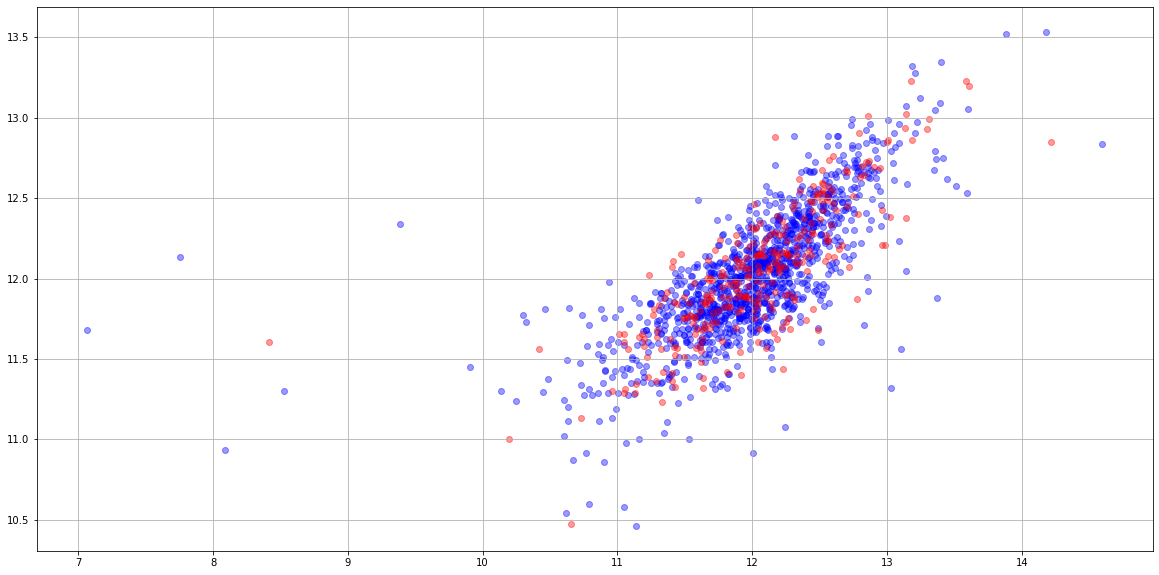

In [15]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain_lso), ytrain_lso, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest_lso), ytest_lso, color='red', alpha=0.4)
plt.grid(which='both')

## Trying w Ridge

In [16]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

ridge = Ridge(random_state=state, max_iter=10000, fit_intercept=True)

# parameters to use
# alphas = np.linspace(1e-4, 2.5e-4, 30) 'alpha': alphas,
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
fitintercept = [True, False]

gparam_ridge_1 = {'solver': solvers,
                  'fit_intercept': fitintercept, 
                  'random_state': [state]}

# setting parameters
gs_ridge_1 = ms.GridSearchCV(ridge, gparam_ridge_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_ridge_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_ridge_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_ridge_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_ridge_1, ytrain, xtrain))
test_rmse.append(rmse(gs_ridge_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_ridge_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
ridge_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
ridge_res_df = pd.DataFrame(ridge_list_results).T
ridge_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
ridge_res_df = pd.concat([ridge_res_df, best_par_df], axis=1, sort=False)

ridge_res_df

Wall time: 729 ms


C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.12486179 -0.12486179 -0.12486179 -0.12496389 -0.12500384 -0.12490236
 -0.12493106         nan -0.18935915 -0.18935915 -0.18935915 -0.19249132
 -0.30593686 -0.19122602 -0.19257892         nan]
  warnings.warn(
C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-0.08862159 -0.08862159 -0.08862159 -0.08877601 -0.08880473 -0.08881341
 -0.08907774         nan -0.12177762 -0.12177762 -0.12177762 -0.12475086
 -0.25969355 -0.12322655 -0.12502551         nan]
  warnings.warn(


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,fit_intercept,random_state,solver
0,0.946551,0.922084,0.091634,0.114912,-0.023278,True,0,svd


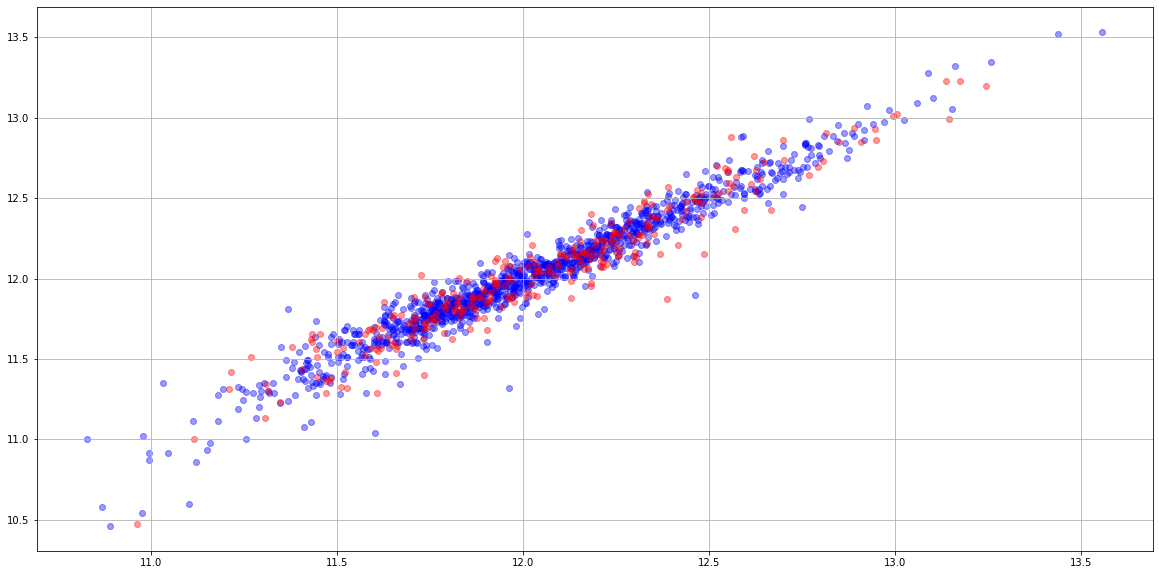

In [17]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_ridge_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_ridge_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [18]:
ridge_coef_strd = pd.Series(gs_ridge_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(ridge_coef_strd.abs().sort_values(ascending=False).to_string())

GrLivArea                4.757211e-01
1stFlrSF                 3.755638e-01
OverallQual              3.212315e-01
BsmtFinSF1               2.673641e-01
OverallCond              2.669106e-01
LotArea                  2.654553e-01
TotalBsmtSF              2.653699e-01
MSZoning_FV              2.418191e-01
2ndFlrSF                 2.088373e-01
MSZoning_RL              2.019589e-01
Functional_Maj2          1.971124e-01
MSZoning_RH              1.871135e-01
MSZoning_RM              1.632863e-01
YearBuilt                1.555799e-01
FullBath                 1.500491e-01
Neighborhood_StoneBr     1.487894e-01
TotRmsAbvGrd             1.460886e-01
Exterior1st_BrkComm      1.299935e-01
SaleType_ConLD           1.290520e-01
WoodDeckSF               1.262572e-01
ScreenPorch              1.191555e-01
Street_Pave              1.094178e-01
GarageArea               1.089026e-01
GarageCars               1.081825e-01
KitchenAbvGr             1.057775e-01
SaleType_CWD             1.042750e-01
LotFrontage 

In [19]:
ridge_coef_index_01 = [i for i, x in enumerate(ridge_coef_strd) if abs(x) > 0]

hp_ridge_strd_reduced = hp_full_strd.iloc[:,ridge_coef_index_01]

hp_ridge_strd_reduced

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,Sal

- because Ridge thinks all of the features have some kind of importance, the list is not actually of much value

## Trying w ElasticNet

In [20]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

enet = ElasticNet(random_state=state, max_iter=10000,
                  normalize=True, fit_intercept=True)

# parameters to use
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 10, 100]
l1ratio = [0, 0.25, 0.5, 0.75, 1]
fitintercept = [True, False]
precomputes = [True, False]
warmstart = [True, False]
selections = ['cyclic', 'random']

gparam_enet_1 = {'alpha': alphas,
                  'l1_ratio': l1ratio,
                  'fit_intercept': fitintercept,
                  'precompute': precomputes, 
                  'warm_start': warmstart,
                  'selection': selections,
                  'random_state': [state]}

# setting parameters
gs_enet_1 = ms.GridSearchCV(enet, gparam_enet_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_enet_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_enet_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_enet_1, ytrain, xtrain))
test_rmse.append(rmse(gs_enet_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_enet_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
enet_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
enet_res_df = pd.DataFrame(enet_list_results).T
enet_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
enet_res_df = pd.concat([enet_res_df, best_par_df], axis=1, sort=False)

enet_res_df

Wall time: 1min 16s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha,fit_intercept,l1_ratio,precompute,random_state,selection,warm_start
0,0.93309,0.937562,0.102525,0.102867,-0.000342,0.0001,True,1,False,0,random,True


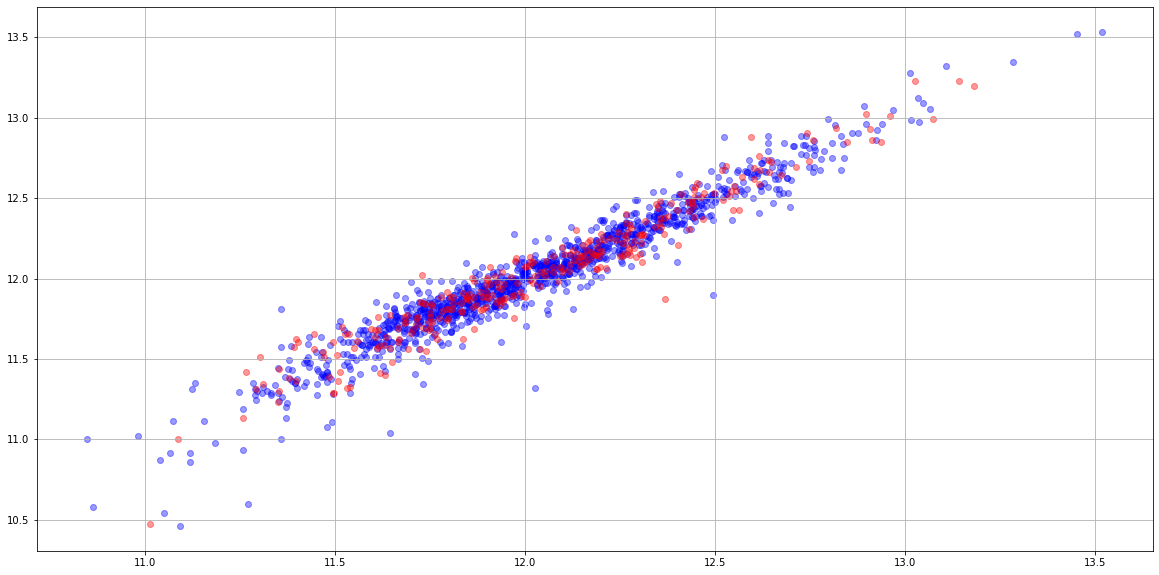

In [21]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_enet_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_enet_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [22]:
enet_coef_strd = pd.Series(gs_enet_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(enet_coef_strd.abs().sort_values(ascending=False).to_string())

GrLivArea                1.220836
OverallQual              0.502191
TotalBsmtSF              0.478081
LotArea                  0.348845
OverallCond              0.278488
BsmtFinSF1               0.245233
Functional_Sev           0.222715
PoolQC_Gd                0.212616
YearBuilt                0.203776
Functional_Maj2          0.156604
Exterior1st_BrkComm      0.138451
KitchenAbvGr             0.134736
GarageCars               0.132983
Street_Pave              0.115156
Neighborhood_StoneBr     0.108206
Neighborhood_Crawfor     0.101597
Heating_Grav             0.099857
GarageArea               0.097846
SaleCondition_Partial    0.095602
Fireplaces               0.090128
ScreenPorch              0.089888
WoodDeckSF               0.087596
LotFrontage              0.085831
Neighborhood_MeadowV     0.074429
MSSubClass_160.0         0.071768
BsmtFullBath             0.069221
MSZoning_FV              0.068960
SaleType_ConLI           0.066842
Neighborhood_NridgHt     0.062040
YearRemodAdd  

In [23]:
# columns that were dropped by enet

enet_coef_index_00 = [i for i, x in enumerate(enet_coef_strd) if abs(x) == 0]
hp_enet_strd_dropped = hp_full_strd.iloc[:, enet_coef_index_00]
list(hp_enet_strd_dropped.columns)

['BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'EnclosedPorch',
 'PoolArea',
 'MiscVal',
 'MSZoning_RM',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_S

# Tree Models

## Trying w RFR

In [24]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

rfr = RandomForestRegressor()

# parameters to use
# maxdepth = [10, 25, 50, 100, 250, 500]
# minsamlf = [1, 2, 3, 4, 5]
# minsamsplt = [2, 3, 4, 5]
# nestimators = [100, 250, 400, 500]
# oobscore = [True, False]
# warmstart = [True, False]
# 'max_depth': maxdepth,
#               'min_samples_leaf': minsamlf,
#               'min_samples_split': minsamsplt,
#               'n_estimators': nestimators,
#               'oob_score': oobscore,
#               'warm_start': warmstart

gparam_rfr = {}

# setting parameters
gs_rfr = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_rfr.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_rfr.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr, ytrain, xtrain))
test_rmse.append(rmse(gs_rfr, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_rfr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 3.19 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.982157,0.915966,0.052945,0.119338,-0.066393


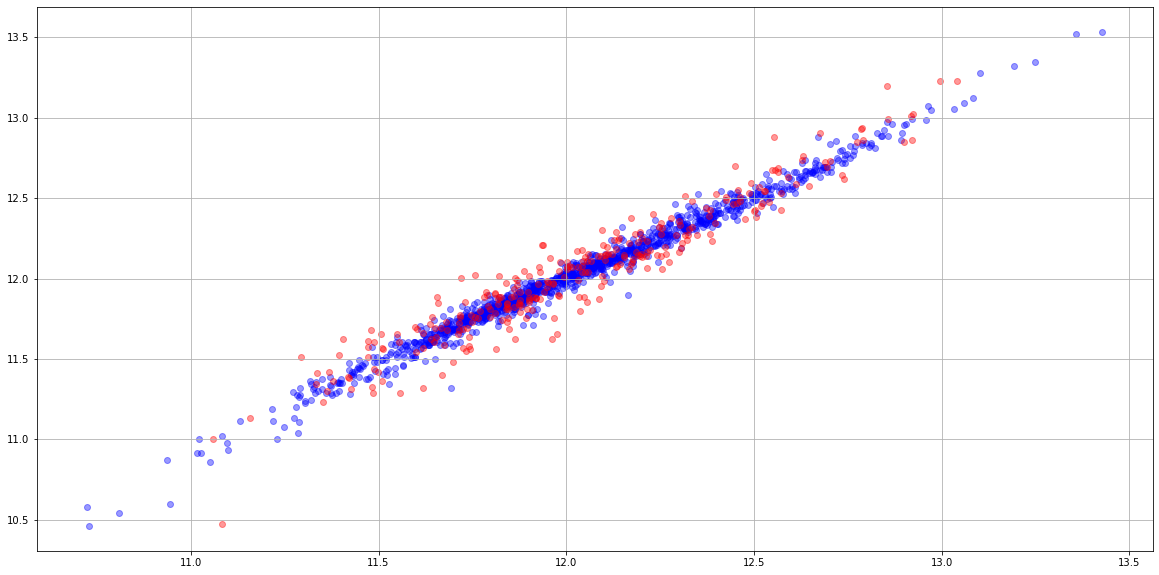

In [25]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [26]:
sorted_importance_rfr = sorted(zip(hp_full_strd.columns,
                                   gs_rfr.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_rfr

[('OverallQual', 0.5323947278083783),
 ('GrLivArea', 0.09750984004870522),
 ('TotalBsmtSF', 0.04748155346802403),
 ('GarageCars', 0.044869897273507),
 ('GarageArea', 0.032785409416123214),
 ('1stFlrSF', 0.02230877563277809),
 ('BsmtFinSF1', 0.021685367950969328),
 ('YearBuilt', 0.019108741620282883),
 ('CentralAir_Y', 0.014553110473069526),
 ('LotArea', 0.012459128241380008),
 ('OverallCond', 0.01083882506635934),
 ('YearRemodAdd', 0.009894316785803776),
 ('GarageYrBlt', 0.00912902652555242),
 ('BsmtUnfSF', 0.0061110694824385685),
 ('LotFrontage', 0.006100883951822782),
 ('2ndFlrSF', 0.005699691476139948),
 ('MSZoning_RM', 0.004739474163469725),
 ('OpenPorchSF', 0.004599373097695009),
 ('Fireplaces', 0.0038722762928523765),
 ('ExterCond_Fa', 0.0035505953082603445),
 ('GarageType_Detchd', 0.0035398513910772965),
 ('KitchenAbvGr', 0.0032420254702510377),
 ('GarageCond_TA', 0.0031932193273515323),
 ('WoodDeckSF', 0.003015734355916151),
 ('FireplaceQu_None', 0.0029839197750786296),
 ('TotR

In [27]:
filtered_sorted_importance_rfr = [x for x in sorted_importance_rfr if x[1]>0]
filtered_sorted_importance_rfr

[('OverallQual', 0.5323947278083783),
 ('GrLivArea', 0.09750984004870522),
 ('TotalBsmtSF', 0.04748155346802403),
 ('GarageCars', 0.044869897273507),
 ('GarageArea', 0.032785409416123214),
 ('1stFlrSF', 0.02230877563277809),
 ('BsmtFinSF1', 0.021685367950969328),
 ('YearBuilt', 0.019108741620282883),
 ('CentralAir_Y', 0.014553110473069526),
 ('LotArea', 0.012459128241380008),
 ('OverallCond', 0.01083882506635934),
 ('YearRemodAdd', 0.009894316785803776),
 ('GarageYrBlt', 0.00912902652555242),
 ('BsmtUnfSF', 0.0061110694824385685),
 ('LotFrontage', 0.006100883951822782),
 ('2ndFlrSF', 0.005699691476139948),
 ('MSZoning_RM', 0.004739474163469725),
 ('OpenPorchSF', 0.004599373097695009),
 ('Fireplaces', 0.0038722762928523765),
 ('ExterCond_Fa', 0.0035505953082603445),
 ('GarageType_Detchd', 0.0035398513910772965),
 ('KitchenAbvGr', 0.0032420254702510377),
 ('GarageCond_TA', 0.0031932193273515323),
 ('WoodDeckSF', 0.003015734355916151),
 ('FireplaceQu_None', 0.0029839197750786296),
 ('TotR

## Trying w GBR

In [28]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

gbm = GradientBoostingRegressor()

# learningrate = [0.01, 0.05, 0.1, 0.5, 1] # subsequently, fine tune
# nestimators = [5, 10, 50, 100, 200, 300, 400, 500]
# maxfeatures = [9, 20, 40, 60, 100, 150, 176]
# maxdepth = [1, 2, 3, 4, 5]
# 'learning_rate': learningrate,
#               'n_estimators': nestimators, 
#               'max_features': maxfeatures,
#               'max_depth': maxdepth

gparam_gbm = {}

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_gbm.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_gbm.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm, ytrain, xtrain))
test_rmse.append(rmse(gs_gbm, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_gbm.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

Wall time: 1.29 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.960623,0.919314,0.078651,0.116937,-0.038286


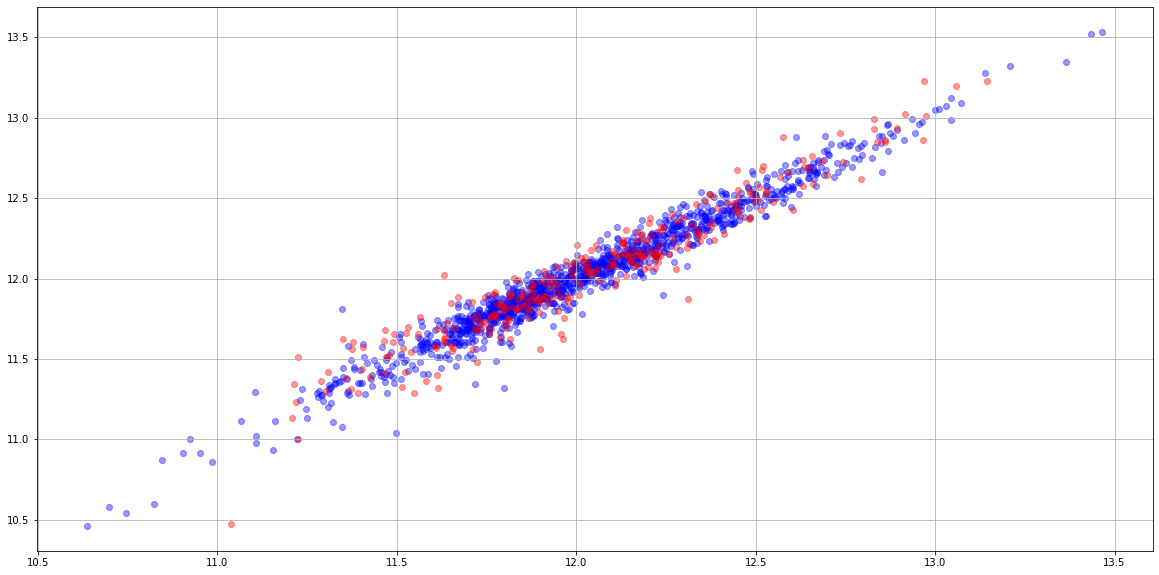

In [29]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [30]:
sorted_importance_gbm = sorted(zip(hp_full_strd.columns,
                                   gs_gbm.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_gbm

[('OverallQual', 0.4582559829623643),
 ('GrLivArea', 0.17187018657331601),
 ('TotalBsmtSF', 0.04296235184127503),
 ('GarageCars', 0.042902750564956356),
 ('YearBuilt', 0.04116627424583678),
 ('YearRemodAdd', 0.033787659020861685),
 ('BsmtFinSF1', 0.028312747272765896),
 ('LotArea', 0.017745930577855718),
 ('OverallCond', 0.01756423995365692),
 ('GarageArea', 0.015276388089904232),
 ('1stFlrSF', 0.014188336784434884),
 ('Fireplaces', 0.01292570759623162),
 ('CentralAir_Y', 0.012749988584581437),
 ('GarageYrBlt', 0.007751504138838419),
 ('MSZoning_RL', 0.007413201386258407),
 ('KitchenQual_TA', 0.006259481164461731),
 ('FireplaceQu_None', 0.004191445499560507),
 ('FullBath', 0.0035834433845349694),
 ('GarageCond_TA', 0.0034648017489619584),
 ('KitchenAbvGr', 0.002996536590169594),
 ('LotFrontage', 0.0028302629520637274),
 ('BsmtFinType1_GLQ', 0.0026841822185777703),
 ('GarageType_Attchd', 0.0024468108620214275),
 ('BsmtExposure_Gd', 0.00226489772531821),
 ('HalfBath', 0.00221492466369753

In [31]:
filtered_sorted_importance_gbm = [x for x in sorted_importance_gbm if x[1]>0]
filtered_sorted_importance_gbm

[('OverallQual', 0.4582559829623643),
 ('GrLivArea', 0.17187018657331601),
 ('TotalBsmtSF', 0.04296235184127503),
 ('GarageCars', 0.042902750564956356),
 ('YearBuilt', 0.04116627424583678),
 ('YearRemodAdd', 0.033787659020861685),
 ('BsmtFinSF1', 0.028312747272765896),
 ('LotArea', 0.017745930577855718),
 ('OverallCond', 0.01756423995365692),
 ('GarageArea', 0.015276388089904232),
 ('1stFlrSF', 0.014188336784434884),
 ('Fireplaces', 0.01292570759623162),
 ('CentralAir_Y', 0.012749988584581437),
 ('GarageYrBlt', 0.007751504138838419),
 ('MSZoning_RL', 0.007413201386258407),
 ('KitchenQual_TA', 0.006259481164461731),
 ('FireplaceQu_None', 0.004191445499560507),
 ('FullBath', 0.0035834433845349694),
 ('GarageCond_TA', 0.0034648017489619584),
 ('KitchenAbvGr', 0.002996536590169594),
 ('LotFrontage', 0.0028302629520637274),
 ('BsmtFinType1_GLQ', 0.0026841822185777703),
 ('GarageType_Attchd', 0.0024468108620214275),
 ('BsmtExposure_Gd', 0.00226489772531821),
 ('HalfBath', 0.00221492466369753

# Trying w XGBoost

In [32]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

xgb_t = xgboost.XGBRegressor()

# evalmetric = ['rmse']
# njobs = [-1]
# randomstate = [state]
# # booster_ = ['gbtree']

# nestimators = [1, 10, 20, 50, 100]
# minchildweight = [1, 3, 5]
# maxdepth = [1, 3, 5]
# learningrate = [0.01, 0.05, 0.1]
# gamma_ = [0.5, 1, 2, 5]
# subsample_ = [0.8, 1]
# # samplingmethod = ['uniform', 'gradient_based']
# colsamplebytree = [0.8, 1]
# lambda_ = [1, 3, 5]
# alpha_ = [1, 3, 5]
# 'eval_metric': evalmetric,
#                 'n_jobs': njobs,
# #                 'booster': booster_,
#                 'n_estimators': nestimators,
#                 'min_child_weight': minchildweight,
#                 'max_depth': maxdepth,
#                 'eta': learningrate,
#                 'gamma': gamma_,
#                 'subsample': subsample_,
# #                 'sampling_method': samplingmethod,
#                 'colsample_bytree': colsamplebytree,
#                 'lambda': lambda_,
#                 'alpha': alpha_,
#                 'random_state': randomstate


gparam_xgb_t = {}

gs_xgb_t = GridSearchCV(xgb_t, gparam_xgb_t, cv=n_folds, refit=True, verbose=1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_t.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_xgb_t.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_xgb_t.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_t, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb_t, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_xgb_t.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
xgb_t_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
xgb_t_res_df = pd.DataFrame(xgb_t_list_results).T
xgb_t_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_t_res_df = pd.concat([xgb_t_res_df, best_par_df], axis=1, sort=False)

xgb_t_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 1.38 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.999561,0.907998,0.008303,0.124868,-0.116564


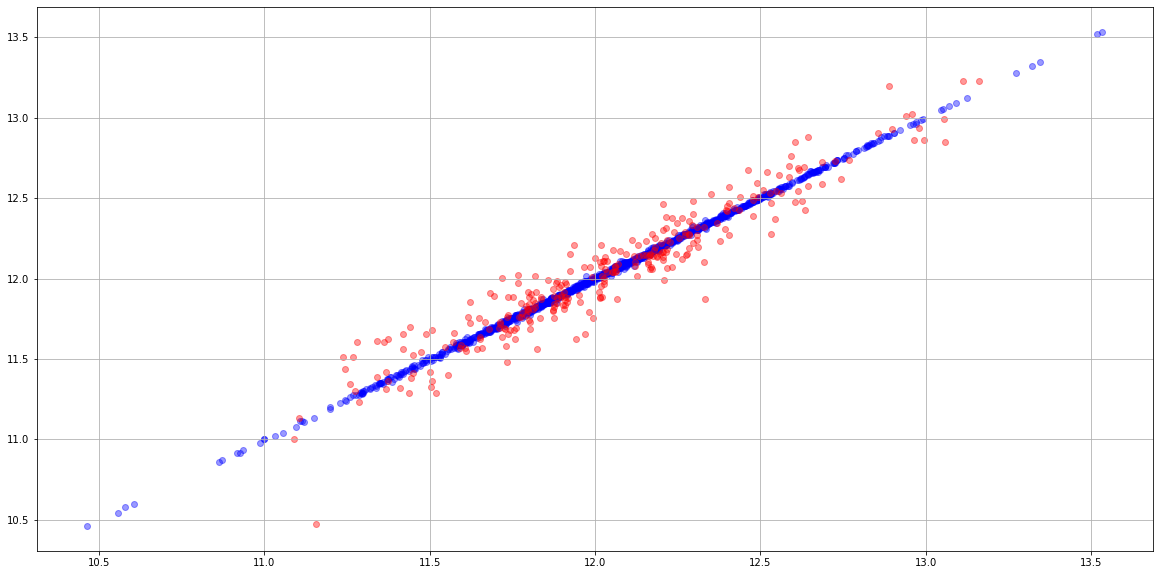

In [33]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_t.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_t.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [34]:
sorted_importance_xgb_t = sorted(zip(hp_full_strd.columns,
                                   gs_xgb_t.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_xgb_t

[('OverallQual', 0.08119357),
 ('Fireplaces', 0.059874482),
 ('MSZoning_RL', 0.05484871),
 ('CentralAir_Y', 0.05410645),
 ('GarageType_Attchd', 0.046219584),
 ('GarageCars', 0.04306004),
 ('Exterior1st_BrkComm', 0.041490093),
 ('Functional_Maj2', 0.039049286),
 ('GrLivArea', 0.035513207),
 ('TotalBsmtSF', 0.023781866),
 ('GarageCond_TA', 0.020114545),
 ('LandSlope_Mod', 0.02008472),
 ('KitchenAbvGr', 0.01980053),
 ('Functional_Mod', 0.018634545),
 ('Neighborhood_Crawfor', 0.016557036),
 ('YearRemodAdd', 0.015887262),
 ('Exterior2nd_WdShing', 0.013846823),
 ('Fence_GdWo', 0.013350254),
 ('Electrical_FuseP', 0.011541149),
 ('ExterCond_Fa', 0.010033462),
 ('PoolArea', 0.009678714),
 ('SaleCondition_Family', 0.009440548),
 ('YearBuilt', 0.009031041),
 ('BsmtCond_Po', 0.008966454),
 ('MSZoning_RM', 0.008802159),
 ('RoofStyle_Gambrel', 0.008587929),
 ('FireplaceQu_Po', 0.008247004),
 ('BsmtFinSF1', 0.00794043),
 ('OverallCond', 0.0073499093),
 ('SaleType_New', 0.0065081823),
 ('Fence_None', 

In [35]:
filtered_sorted_importance_xgb_t = [x for x in sorted_importance_xgb_t if x[1]>0]
filtered_sorted_importance_xgb_t

[('OverallQual', 0.08119357),
 ('Fireplaces', 0.059874482),
 ('MSZoning_RL', 0.05484871),
 ('CentralAir_Y', 0.05410645),
 ('GarageType_Attchd', 0.046219584),
 ('GarageCars', 0.04306004),
 ('Exterior1st_BrkComm', 0.041490093),
 ('Functional_Maj2', 0.039049286),
 ('GrLivArea', 0.035513207),
 ('TotalBsmtSF', 0.023781866),
 ('GarageCond_TA', 0.020114545),
 ('LandSlope_Mod', 0.02008472),
 ('KitchenAbvGr', 0.01980053),
 ('Functional_Mod', 0.018634545),
 ('Neighborhood_Crawfor', 0.016557036),
 ('YearRemodAdd', 0.015887262),
 ('Exterior2nd_WdShing', 0.013846823),
 ('Fence_GdWo', 0.013350254),
 ('Electrical_FuseP', 0.011541149),
 ('ExterCond_Fa', 0.010033462),
 ('PoolArea', 0.009678714),
 ('SaleCondition_Family', 0.009440548),
 ('YearBuilt', 0.009031041),
 ('BsmtCond_Po', 0.008966454),
 ('MSZoning_RM', 0.008802159),
 ('RoofStyle_Gambrel', 0.008587929),
 ('FireplaceQu_Po', 0.008247004),
 ('BsmtFinSF1', 0.00794043),
 ('OverallCond', 0.0073499093),
 ('SaleType_New', 0.0065081823),
 ('Fence_None', 

# Combine the lists of importances

In [36]:
lasso_list = list(hp_lasso_strd_reduced.columns)
enet_list = list(hp_enet_strd_dropped.columns)
rfr_list = [x[0] for x in filtered_sorted_importance_rfr]
gbm_list = [x[0] for x in filtered_sorted_importance_gbm]
xgb_list = [x[0] for x in filtered_sorted_importance_xgb_t]

full_list = list(set(lasso_list + enet_list + rfr_list + gbm_list + xgb_list))
len(full_list)

288

In [37]:
pd.DataFrame(lasso_list).to_csv('..\hp_1c_important_feat_lasso.csv')
pd.DataFrame(enet_list).to_csv('..\hp_1c_important_feat_enet.csv')
pd.DataFrame(rfr_list).to_csv('..\hp_1c_important_feat_rfr.csv')
pd.DataFrame(gbm_list).to_csv('..\hp_1c_important_feat_gbr.csv')
pd.DataFrame(xgb_list).to_csv('..\hp_1c_important_feat_xgb.csv')
# pd.DataFrame(full_list).to_csv('..\hp_1c_important_feat_full.csv')

In [38]:
# test = pd.read_csv('..\hp_2_null_impute_dum_full_test.csv')

# test_lasso_rdc = test[hp_lasso_strd_reduced.columns]

# prediction = pd.DataFrame(gs_mlr.best_estimator_.predict(test_lasso_rdc))

# prediction = prediction.reset_index()
# prediction['index'] = prediction['index'] + 1461
# prediction.columns = ['Id', 'SalePrice']
# prediction['SalePrice'] = np.exp(prediction['SalePrice'])

# prediction.to_csv('oct_try.csv', index=False, encoding='utf-8')

# prediction

# #.13531